In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import urllib.request

In [2]:
# Step 1: Download MobileNet SSD model files
prototxt_url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt'
model_url = 'https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel'

urllib.request.urlretrieve(prototxt_url, 'deploy.prototxt')
urllib.request.urlretrieve(model_url, 'res10_300x300_ssd_iter_140000.caffemodel')


('res10_300x300_ssd_iter_140000.caffemodel',
 <http.client.HTTPMessage at 0x7e82b85e9650>)

In [3]:
# Step 2: Load model
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'res10_300x300_ssd_iter_140000.caffemodel')

Saving friends.PNG to friends.PNG


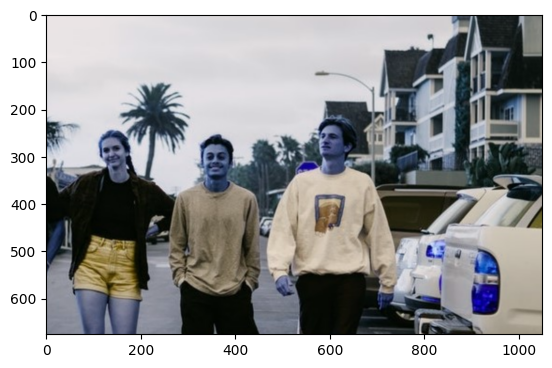

In [4]:
# Step 3: Upload image
uploaded = files.upload()
image_path = next(iter(uploaded))
image = cv2.imread(image_path)
(h, w) = image.shape[:2]
plt.imshow(image)

In [5]:
# Step 4: Prepare input for the model
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
                             (300, 300), (104.0, 177.0, 123.0))

net.setInput(blob)
detections = net.forward()

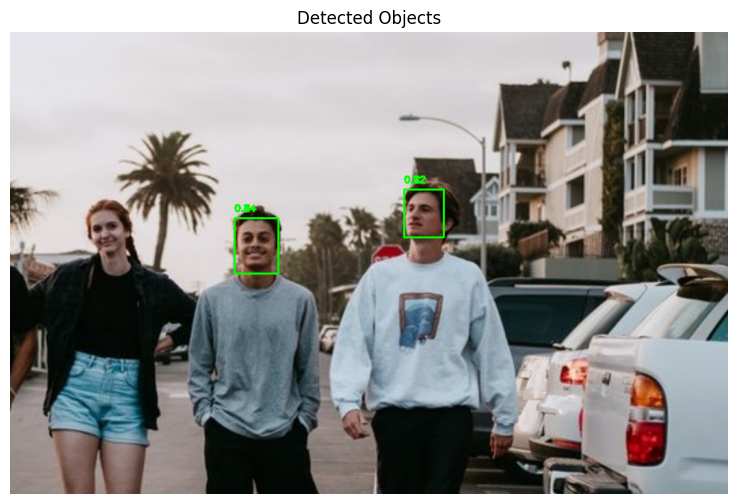

In [6]:
# Step 5: Draw detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
        text = f"{confidence:.2f}"
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(image, text, (startX, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

# Step 6: Show final result
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Detected Objects")
plt.show()